<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [32]:
import pandas as pd
import psycopg2
import plotly.express as px

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [ ]:
# количество строчек в таблице с вакансиями
query_3_1 = f'''SELECT COUNT(id) 
                FROM public.vacancies
'''

In [16]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df


C:\Users\l340\AppData\Local\Temp\ipykernel_12668\3241158491.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [ ]:
# количество строчек в таблице с работодателями
query_3_2 = f'''SELECT COUNT(id) 
                FROM public.employers
'''


In [24]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df


C:\Users\l340\AppData\Local\Temp\ipykernel_12668\1374563366.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
# количество строчек в таблице с регионами
query_3_3 = f'''SELECT COUNT(id) 
                FROM public.areas
'''


In [26]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12668\928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
# количество строчек в таблице со сферами деятельности
query_3_4 = f'''SELECT COUNT(id) 
                FROM public.industries


'''

In [28]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df


C:\Users\l340\AppData\Local\Temp\ipykernel_12668\1211709877.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

### выводы по предварительному анализу данных
* На основании данных предварительного анализа можно сделать обобщающие выводы о состоянии рынка труда. В среднем каждая компания имеет по 2 открытых вакансии. 
* На одного соискателя приходится по 80 работодателей на сферу деятельности. 

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# вычисляем сколько вакансий, группируя по регионам, и выводим рейтинг
query_4_1 = f'''select a.name area, count(v.name) cnt
          from areas a
          join vacancies v on a.id = v.area_id
          group by area
          order by cnt desc
          limit 5'''         


In [45]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_5740\2457173557.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# вычисляем количество вакансий, в которых указана ЗП
query_4_2 = f'''select count(id)
                from vacancies
                where (salary_from IS NOT NULL) or (salary_to IS NOT NULL)
                

               
'''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_13672\970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
# значение зарплатной вилки
query_4_3 = f'''SELECT ROUND(AVG(salary_to)), ROUND(AVG(salary_from))
                FROM public.vacancies
               '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_13672\2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,round,round
0,110537.0,71065.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# Рейтинг количества вакансий в зависимости от графика и типа трудоустройства
query_4_4 = f'''SELECT v.schedule,v.employment, COUNT(v.id) qty
                FROM public.vacancies v JOIN public.employers e ON v.employer_id=e.id
                GROUP BY v.schedule,v.employment
                ORDER BY qty DESC
               '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_13672\2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,qty
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [ ]:
# вычисляем количество вакансий в зависимости от опыта работы
query_4_5 = f'''SELECT experience AS "Требуемый опыт работы", COUNT(id)
                FROM public.vacancies 
                GROUP BY 1
                ORDER BY 2 
               '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_13672\2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,Требуемый опыт работы,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [ ]:
# выбираем данные для построени зависимости ЗП от региона
# используем coalesce(), чтобы в данных ЗП не было пропусков
query_4_6 = f'''SELECT AVG(COALESCE((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to, 0)) as "Заработанная плата" , a.name as "Наименование региона"
                FROM public.vacancies v
                JOIN public.areas a ON v.area_id=a.id
                GROUP BY a.name
                ORDER BY 1 DESC
                LIMIT 10
                
               '''

C:\Users\l340\AppData\Local\Temp\ipykernel_13120\3334562694.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



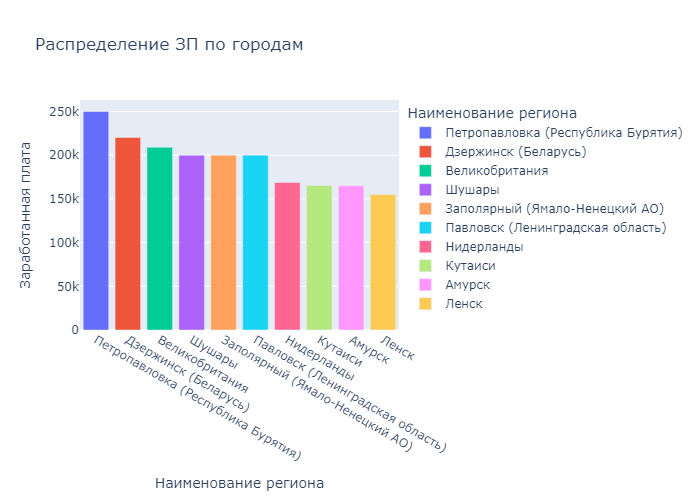

In [42]:

df = pd.read_sql_query(query_4_6, connection)
fig = px.bar(df,
                x='Наименование региона',
                y='Заработанная плата',
                color='Наименование региона',
                
                title='Распределение ЗП по городам')

fig.show('png')

***

### выводы по детальному анализу вакансий
* Преобладающее количество вакансий в столицах, больше всего вакансий в Москве, что также может быть связано с численностью населения. 
* Наиболее распространненый тип графика: полная занятость/полный рабочий день, то есть люди отдают предпочтение стандартному графику работы. 
* Наибольшее количество вакансий приходится на опыт от 1 до 3 лет, наименьшее количество вакансий для более 6 лет опыта. Это может быть связано с тем , что работодатель предпочитает соискателей, которые сменили несколько мест работы, но на каждом из них были не менее года.
* Наибольшая усредненная зарплата в Республике Бурятия, которая превосходит зарплаты в странах Европы. Это может быть связано с плохими климатическими условиями в данном регионе (климат резко-континентальный, с продолжительной холодной зимой и жарким коротким летом)

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# Рейтинг работодателей по количеству вакансий
query_5_1 = f'''SELECT e.name, COUNT(v.id)
                FROM public.vacancies v JOIN public.employers e ON v.employer_id=e.id 
                GROUP BY 1
                ORDER BY 2 DESC
                LIMIT 5
               '''

In [7]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12844\3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# Рейтинг регионов по количеству работодателей, которые не указывают вакансии
query_5_2 = f'''SELECT a.name area , COUNT(DISTINCT v.id) vacancies,COUNT(DISTINCT e.id) employers
                FROM public.areas a 
                    LEFT JOIN public.vacancies v ON a.id=v.area_id
                    LEFT JOIN public.employers e ON a.id=e.area 
                WHERE v.area_id IS NULL
                GROUP BY 1
                ORDER BY 3 DESC
                
               '''

In [13]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12744\2250345976.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,area,vacancies,employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# Рейтинг работодателей по регионам, в которых публикуются вакансии
query_5_3 = f'''SELECT e.name , COUNT(DISTINCT(area_id)) qty_areas
                FROM public.vacancies v 
                JOIN public.employers e ON v.employer_id=e.id
                JOIN public.areas a ON v.area_id=a.id 
                GROUP BY 1
                ORDER BY 2 DESC
               '''

In [83]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_5740\201667002.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,qty_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:
# вычисляем работодателей без сфер деятельности
query_5_4 = f'''SELECT COUNT(e.id)
                FROM public.employers e 
                     LEFT JOIN public.employers_industries em ON e.id=em.employer_id
                WHERE em.industry_id IS NULL
                GROUP BY e.id
               '''

In [42]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12744\3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,count
0,1
1,1
2,1
3,1
4,1
...,...
8414,1
8415,1
8416,1
8417,1


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
# Рейтинг компаний , у которых 4 сферы деятельности 
query_5_5 = f'''SELECT e.name
                FROM public.employers_industries em JOIN public.employers e ON em.employer_id=e.id
                GROUP BY e.name
                HAVING COUNT(em.industry_id)=4
                ORDER BY 1
               '''

In [38]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12744\388711819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name
0,101 Интернет
1,21vek.by
2,2ГИС
3,2К
4,4 пикселя +
...,...
1131,ЮРИОН
1132,ЮТИП Технологии
1133,ЯКласс
1134,ЯрНео


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
# вычисляем количество работодателей со сферой деятельности-Разработка ПО
query_5_6 = f'''SELECT COUNT(DISTINCT e.id)
                FROM public.employers e 
                     LEFT JOIN public.employers_industries em ON e.id=em.employer_id
                     LEFT JOIN public.industries i ON em.industry_id=i.id
                WHERE i.name='Разработка программного обеспечения'
                GROUP BY e.id
               '''

In [42]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12988\821628714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,count
0,1
1,1
2,1
3,1
4,1
...,...
3548,1
3549,1
3550,1
3551,1


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [43]:
# код для получения списка городов-милионников
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title.text,'\n')
tabl = page.find("table", class_="standard")    

town = []
tt = tabl.find("tbody") # в таблице выбираем тело таблицы
qq = tt.find_all("tr")  # в теле таблицы выбираем все ряды

for ss in qq:
  qqq = list(ss.find("a"))  # в каждом ряде находим тег "а", преобразуем его в список
  town.append(qqq[0])       # и добавляем содержимое к списку городов

town = town[1:]           # в первом ряду кусок от названия, отсекаем его
           
print(town)

Города-миллионеры России — Википедия 

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [ ]:
query_5_7 = f'''(select a.name area, count(v.id) count
          from employers e
          join vacancies v on e.id = v.employer_id
          join areas a on v.area_id = a.id
          where (e.name = 'Яндекс')'''
ll = len(town)
if ll > 0:
  str = f" AND (( a.name = '{town[0]}')" # если есть хоть один город миллионник
  if ll > 1:
    for s in town[1:]:
      str += f" OR (a.name = '{s}')" 
      query += (str + f''')
          group by a.name
          order by  2 desc)'''  

In [45]:
query_5_7 =f'''
          (select a.name area, count(v.id) count
          from employers e
          join vacancies v on e.id = v.employer_id
          join areas a on v.area_id = a.id
          where (e.name = 'Яндекс')'''
# далее формируем строку для фильтрации городов миллионников из предыдущего блока
# в результате которого получили список городов миллионников
ll = len(town)
if ll > 0:
  str = f" AND (( a.name = '{town[0]}')" # если есть хоть один город миллионник
  if ll > 1:
    for s in town[1:]:
      str += f" OR (a.name = '{s}')"      

query_5_7 += (str + f''')
          group by a.name
          order by  2 desc)
          '''
          +                             
'''
          
          union  all
          select 'Total :' area, count( v.id)
          from employers e
          join vacancies v on e.id = v.employer_id
          join areas a on v.area_id = a.id
          where (e.name = 'Яндекс')'''
          +str
          +
'''       )
          group by area
          order by  2
'''
)

In [38]:
query_5_7 = f'''WITH temp AS(
                     select a.name,
                     COUNT (*) cnt
                FROM 
                     vacancies v
                LEFT JOIN 
                     areas a ON a.id = v.area_id
                LEFT JOIN 
                     employers e ON e.id = v.employer_id
                WHERE e.name = 'Яндекс'
                      AND a.name in {town}
                GROUP BY 1
                ORDER BY 2
               )
                SELECT *  FROM temp
                UNION ALL
                SELECT 
                     'Total', 
                     sum(cnt)  
                FROM temp'''

In [46]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12692\1965596796.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,area,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Казань,25
5,Ростов-на-Дону,25
6,Пермь,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


In [ ]:
# Рейтинг работодателей по количеству сфер деятельности
query_5_8 = f'''SELECT e.name, COUNT(DISTINCT em.industry_id)
                FROM public.employers_industries em JOIN public.employers e ON em.employer_id=e.id
                GROUP BY e.name
                ORDER BY 2 DESC
               '''

In [128]:
df = pd.read_sql_query(query_5_8, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_5740\2986420559.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Модуль,16
1,Энергия,10
2,Прайд,10
3,СБК,9
4,Альфа,9
...,...,...
14951,ПассатИнновации,1
14952,Хьюман Аппс/ Human Apps,1
14953,Хьюман Фокус Медиа,1
14954,Divo.ai,1


In [ ]:
# Рейтинг сфер деятельности по количеству вакансий
query_5_9 = f'''SELECT i.name, COUNT(DISTINCT e.id)
                FROM public.industries i 
                     LEFT JOIN public.employers_industries em ON i.id=em.industry_id
                     LEFT JOIN public.employers e ON e.id=em.employer_id
                GROUP BY i.name
                ORDER BY 2 DESC
               '''

In [134]:
df = pd.read_sql_query(query_5_9, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_5740\137330334.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
...,...,...
289,Благотворительная организация,4
290,"Лифтовое хозяйство (монтаж, сервис, ремонт)",4
291,"Ботанический сад, зоопарк, заповедник",3
292,Автошкола,3


***

### выводы по детальному анализу вакансий
* Больше всего вакансий у известных корпораций (Яндекс,СБЕР и тд), это связано с тем, что корпорациям требуется огромное количество работников.
* Большинство работодателей находится в России, это неудивительно, так как сайт поиска работы-российский.
* Компания "Яндекс" занимает первое место по количеству вакансий(1933) и по количеству регионов вакансий(181). Это явно указывает на то, что данная компания нуждается в преобладающем над другими компаниями количестве кадров.
* Компания "Модуль" наиболее разносторонняя по сферам деятельности (16 сфер)
* Наиболее востребована сфера ИТ, в частности "Разработка программного обеспечения"

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
# вычисляем сколько вакансий относится к данным
query_6_1 = f'''SELECT COUNT(id)
                FROM vacancies 
                WHERE  (name ILIKE '%data%') OR (name ILIKE '%данн%')
                '''
        

In [48]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12988\366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# вычисялем сколько вакансий для дата-саентиста уровня junior
query_6_2 = f'''SELECT COUNT(id)
                FROM vacancies 
                WHERE  ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')) AND ((name ILIKE '%junior%') OR (experience='Нет опыта') OR (employment='Стажировка'))
                '''

In [52]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12988\2267038862.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# вычисляем количество вакансий, в которых указан  ключевой навык - SQL/postgres
query_6_3 = f'''SELECT COUNT(id)
                FROM vacancies 
                WHERE ( (key_skills ILIKE '%SQL%') OR (key_skills ILIKE '%postgres%') )
                 AND
                 ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
                 OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%')) OR (name ILIKE '%machine learning%') OR (name ILIKE '%машинн%обучен%')
                 AND (key_skills IS NOT NULL))
    
        
        '''

In [66]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12988\3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# # вычисляем количество вакансий, в которых указан  ключевой навык - Python
query_6_4 = f'''SELECT COUNT(id)
                FROM vacancies 
                WHERE key_skills ILIKE '%Python%'
                 AND
                 ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
                 OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%')) OR (name ILIKE '%machine learning%') OR (name ILIKE '%машинн%обучен%')
                 AND (key_skills IS NOT NULL))
    
        
        '''

In [68]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12988\4264665179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# вычисляем количество ключевых навыков в вакансиях в среднем
# из длины ключевых навыков вычитаем количество разделителей между навыками и прибавляем 1
query_6_5 = f'''SELECT round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2) 
                FROM VACANCIES
                WHERE     (name ILIKE '%data scientist%' or 
        name ILIKE '%data science%' or 
        name ILIKE '%исследователь данных%' or 
        (name LIKE '%ML%' and 
        name NOT LIKE '%HTML%') or
        name ILIKE '%machine learning%' or 
        name ILIKE '%машинн%обучен%')
                '''

In [32]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12692\3654210517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# вычисляем среднюю зарплату избавляясь от пропусков в данных 
query_6_6 = f'''SELECT experience as experience,
                round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)), 0) as avg_ds
                FROM VACANCIES
           WHERE     (name ILIKE '%data scientist%' or 
        name ILIKE '%data science%' or 
        name ILIKE '%исследователь данных%' or 
        (name LIKE '%ML%' and 
        name NOT LIKE '%HTML%') or
        name ILIKE '%machine learning%' or 
        name ILIKE '%машинн%обучен%')
                GROUP BY 1
                '''

In [34]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_12692\519194770.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,avg_ds
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


In [ ]:
# вычисляем количество вакансий для дата-саентиста
query_6_7 = f'''SELECT  COUNT(id)
                FROM vacancies 
                WHERE  ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%'))
    '''

In [9]:
# результат запроса
df = pd.read_sql_query(query_6_7, connection)
df

C:\Users\l340\AppData\Local\Temp\ipykernel_13120\2268705913.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_7, connection)


,count
0,536


In [ ]:
# отбираем данные для построения зависимости количества вакансий от опыта работы
query_6_8 = f'''SELECT experience as "опыт работы", COUNT(id) as "количество вакансий"
                FROM vacancies 
                WHERE  ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%'))
    GROUP BY 1'''

C:\Users\l340\AppData\Local\Temp\ipykernel_13120\326090355.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



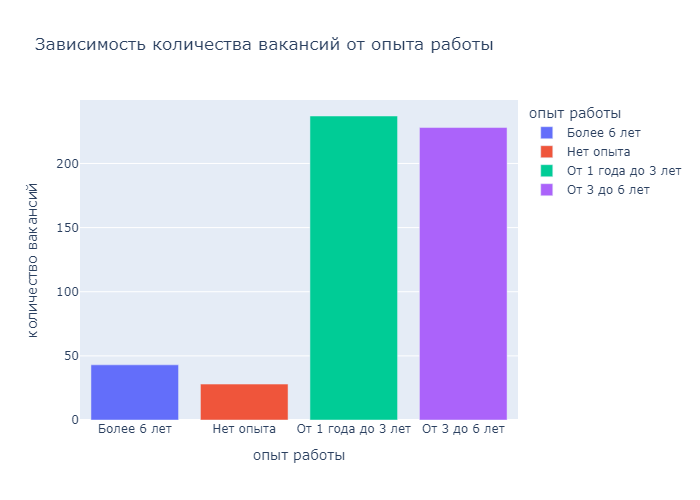

In [43]:
# результат запроса
df = pd.read_sql_query(query_6_8, connection)
fig = px.bar(df,
                x='опыт работы',
                y='количество вакансий',
                color='опыт работы',
                title='Зависимость количества вакансий от опыта работы')

fig.show('png')

***

### выводы по детальному анализу вакансий
* Примерно 10 % от вакансий для дата-саентистов составляют вакансии для специалистов уровня Junior. Это означает, что работодатели неохотно берут сотрудников начальных позиций, или без опыта работы, и предпочитают брать работников с опытом от 1 года до 6 лет.
* В вакансиях с опытом более 6 лет не указывается зарплата,это может быть связано с тем, что сложно оценить навыки при таком опыте работы.
* Наиболее распространненые ключевые навыки : Python, SQL.

## Общий вывод по проекту


* Большинство вакансий предсталено в сфере ИТ 
* Рынок труда в различных городах отличается с преобладающем количеством вакансий в столицах.
* Проще всего найти работу соискателям уже имеющим опыт работы  от 1 года.
* Большая конкуренция для тех, кто хочет войти в сферу data science и не имеет опыта, так как вакансий очень мало.
* Для больших корпораций, таких как Яндекс, количество вакансий равномерно распределено по регионам России, поэтому необязательно искать работу в Москве.